# Cross Correlation to estimate the lethality of the omicron VOC.

Deaths from COVID-19 are a function of the number of covid cases at an unknown point in time. If we define cases as a function of time c(t) and deaths as a function of time d(t) we assume that d(t) = mr*c(t - T). Where mr is the fraction of cases which are fatal and T is the time lag between a positive test and death. 

To estimate T we will cross correlate the signal of cases and deaths. The maximum of the convolution of the two will be equal the value of T.

We use data for deaths and cases from ourworldindata.org for south africa as it experienced cases from omicron before other nations and has a larger population and more robust healthcare system than other nations in southern africa. 

In [2]:
!wget https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

--2021-12-22 23:57:30--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41703325 (40M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  39.77M   183MB/s    in 0.2s    

2021-12-22 23:57:31 (183 MB/s) - ‘owid-covid-data.csv’ saved [41703325/41703325]



In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

csv = pd.read_csv('owid-covid-data.csv')

In [4]:
SA = csv[csv['location'] == 'South Africa']

Remove NaN's from data and cut off early reporting as it is very unreliable 

In [5]:
new_cases = SA['new_cases'][50:]
new_deaths = SA['new_deaths'][50:]
new_cases[np.isnan(new_cases)] = 0
new_deaths[np.isnan(new_deaths)] = 0

In [6]:
#7-day rolling average
kernel = np.ones(7)/7.


ncs = np.convolve(new_cases,kernel)
nds = np.convolve(new_deaths,kernel)

For the analysis, the cumulative weekly deaths and cases are used due to the fluctuations in reporting throughout the week. This reduces noise.

In [9]:

weekly_cases = np.array([sum(new_cases[i:i+7]) for i in range(0,len(new_cases) - 7,7)])
weekly_deaths = np.array([sum(new_deaths[i:i+7]) for i in range(0,len(new_deaths) - 7,7)])

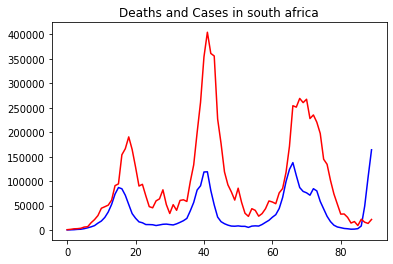

In [11]:
plt.plot(weekly_cases,'b-')
plt.plot(weekly_deaths*100,'r-')
plt.title('Deaths and Cases in south africa')
plt.show()

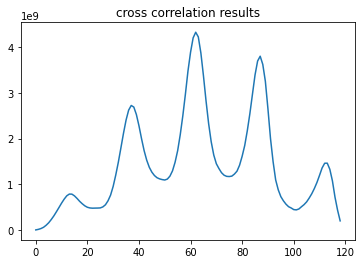

In [23]:
#cut out early data as it often underreported cases realative to deaths
g = np.convolve(weekly_cases[10:70],weekly_deaths[10:70])
plt.plot(g)
plt.title('cross correlation results')
plt.show()

In [24]:
# print(np.argmax(g))
# print(len(g)//2)
print('Time lag = ', np.argmax(g) - len(g)//2 -1, ' Weeks')

Time lag =  2  Weeks


We can see that on average deaths lag cases by 2 weeks in S. Africa

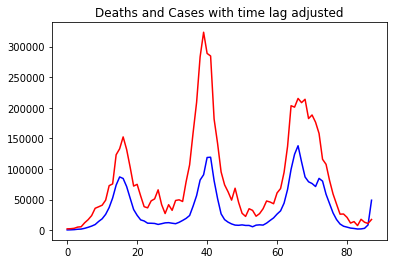

In [25]:
plt.plot(weekly_cases[:-2],'b-')
plt.plot(weekly_deaths[2:]*80,'r-')
plt.title('Deaths and Cases with time lag adjusted')
plt.show()

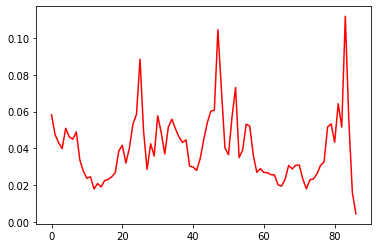

In [28]:
mortality_rate = weekly_deaths[2:]/weekly_cases[:-2]
plt.plot(mortality_rate[1:],'r-')

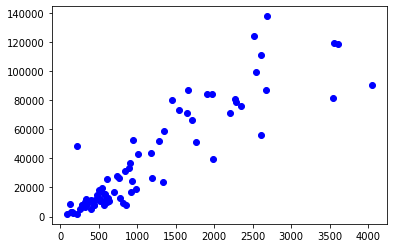

In [31]:
plt.plot(weekly_deaths[2:][10:],weekly_cases[:-2][10:],'bo')

from scipy.stats import linregress 

reg = linregress(weekly_cases[:-2][10:],weekly_deaths[2:][10:])

In [32]:
fatality_rate = reg.slope
fatality_rate

0.0237626160072007

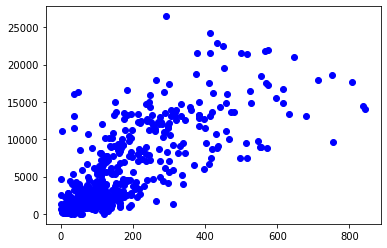

In [33]:
plt.plot(new_deaths[2*7:][10*7:],new_cases[:-2*7][10*7:],'bo')
reg = linregress(weekly_cases[:-3][10*7:],weekly_deaths[3:][10*7:])

In [34]:
rs = []
for i in range(1,60):
  reg = linregress(new_cases[:-i][70:],new_deaths[i:][70:])
  plt.show()
  rs.append(reg.rvalue)

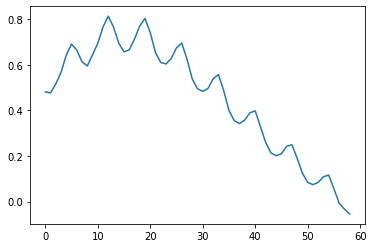

In [35]:
plt.plot(rs)

In [36]:
new_cases = SA['new_cases_smoothed'][50:]
new_deaths = SA['new_deaths_smoothed'][50:]
rs = []
for i in range(1,60):
  reg = linregress(new_cases[:-i][70:],new_deaths[i:][70:])
  plt.show()
  rs.append(reg.rvalue)

np.argmax(rs)+1

15

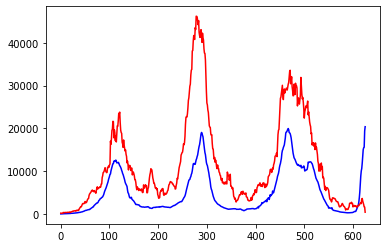

In [37]:
plt.plot(ncs[:-14],'b-')
plt.plot(nds[14:]*80,'r-')

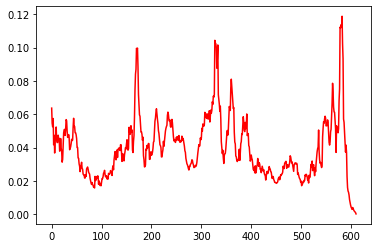

In [42]:
plt.plot(nds[2*7:][15:]/ncs[:-2*7][15:],'r-')

In [40]:
mratio = nds[14:]/ncs[:-14]
dratio = np.average(mratio[400:-25]) #mr during delta wave
oratio = np.average(mratio[-25:]) #mr during omicron wave 
print(dratio)
print(oratio)
print(oratio/dratio)

0.03611547395451995
0.01564249453824209
0.43312444294488867


The quick and dirty result is that there seems to be a ~50% reduction in mortality since the introduction of omicron to S. Africa. This is in line with what early reports have shown so far (70%-30% reduction)

In [45]:
def get_weekly(a):
  weekly = np.array([sum(a[i:i+7]) for i in range(0,len(a) - 7,7)])
  return weekly

hosp = SA['hosp_patients']

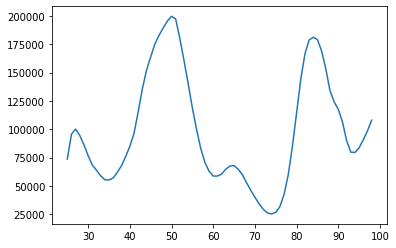

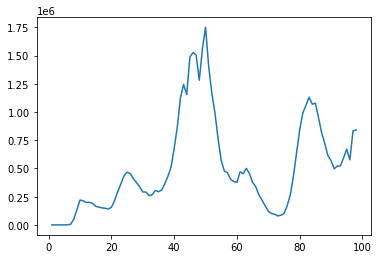

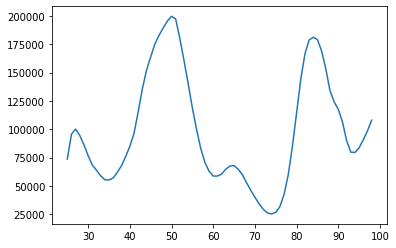

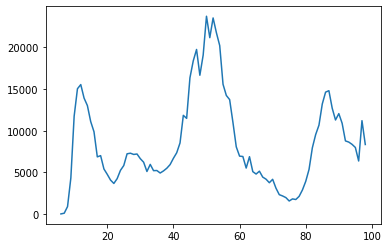

In [62]:

SA = csv[csv['location'] == 'United States']
hosp = SA['hosp_patients']
icu = SA['icu_patients']
cases = SA['new_cases']
deaths = SA['new_deaths']

hospw = get_weekly(hosp)
casesw = get_weekly(cases)
icuw = get_weekly(icu)
deathsw = get_weekly(deaths)

plt.plot(icuw)
plt.show()
plt.plot(casesw)
plt.show()
plt.plot(icuw)
plt.show()
plt.plot(deathsw)
plt.show()

# plt.plot(casesw,icuw,'bo')

3

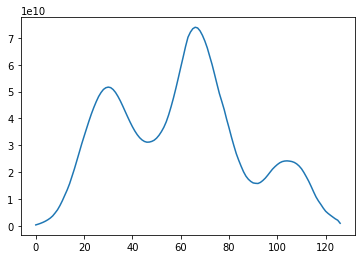

In [79]:
g = np.convolve(deathsw[35:],icuw[35:])
plt.plot(g)
np.argmax(g) - len(g)//2 